<a href="https://colab.research.google.com/github/USharpUtsav/Basic-Clone-/blob/main/ResearchImplementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df=pd.read_csv("/content/final_covid_health_combined.csv")
df.head()

,total_cases,new_cases,total_cases_per_million,new_cases_smoothed,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,new_deaths_smoothed,total_deaths_per_million,...,handwashing_facilities,code,continent,country,date,population,CountryCode,AverageObesity,AvgAlcohol2000_2020,AverageSmokersAdults
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.214695,AFG,Asia,AFGHANISTAN,2020-01-09,40578801.0,AFG,3.04,0.00000,27.94
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,84.804100,DZA,Africa,ALGERIA,2020-01-09,45477339.0,DZA,20.27,0.44286,21.37
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,89.304024,AZE,Asia,AZERBAIJAN,2020-01-09,10295256.0,AZE,15.28,0.67143,25.73
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,100.000000,BHR,Asia,BAHRAIN,2020-01-09,1533408.0,BHR,24.32,1.98095,17.43
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,61.728539,BGD,Asia,BANGLADESH,2020-01-09,169384838.0,BGD,2.05,0.00476,42.27


In [2]:
df=df.drop(['code','CountryCode'],axis=1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8490 entries, 0 to 8489
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   total_cases                      8490 non-null   float64
 1   new_cases                        8490 non-null   float64
 2   total_cases_per_million          8490 non-null   float64
 3   new_cases_smoothed               8490 non-null   float64
 4   new_cases_per_million            8490 non-null   float64
 5   new_cases_smoothed_per_million   8490 non-null   float64
 6   total_deaths                     8490 non-null   float64
 7   new_deaths                       8490 non-null   float64
 8   new_deaths_smoothed              8490 non-null   float64
 9   total_deaths_per_million         8490 non-null   float64
 10  new_deaths_per_million           8490 non-null   float64
 11  new_deaths_smoothed_per_million  8490 non-null   float64
 12  population_density  

In [4]:
(df == 0).sum() / len(df)

,0
total_cases,0.400589
new_cases,0.552650
total_cases_per_million,0.400589
new_cases_smoothed,0.444994
new_cases_per_million,0.552650
new_cases_smoothed_per_million,0.444994
total_deaths,0.566313
new_deaths,0.776090
new_deaths_smoothed,0.662073
total_deaths_per_million,0.566313


In [5]:
sparse_features = ['total_cases','new_cases','total_cases_per_million', 'new_deaths', 'new_cases_smoothed','total_deaths_per_million',
                  'new_deaths_smoothed', 'new_cases_per_million','new_cases_smoothed_per_million','total_deaths','new_deaths','new_deaths_smoothed_per_million',
                  'new_deaths_per_million']

temporal_features = ['date']

static_features = ['population_density', 'median_age', 'hospital_beds_per_thousand','diabetes_prevalence','handwashing_facilities','population',
                  'gdp_per_capita', 'stringency_index','AverageObesity','AvgAlcohol2000_2020','AverageSmokersAdults']

categorical_features = ['country', 'continent']

CATEGORICAL FEATURE ENCODING

In [6]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.2 MB/s eta 0:00:00


In [7]:
from category_encoders import JamesSteinEncoder

cat_cols = ['continent', 'country']
target_col = 'new_cases'  # choose any main prediction target

encoder = JamesSteinEncoder(cols=cat_cols)
df[cat_cols] = encoder.fit_transform(df[cat_cols], df[target_col])


In [8]:
df.head()

,total_cases,new_cases,total_cases_per_million,new_cases_smoothed,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,new_deaths_smoothed,total_deaths_per_million,...,stringency_index,hospital_beds_per_thousand,handwashing_facilities,continent,country,date,population,AverageObesity,AvgAlcohol2000_2020,AverageSmokersAdults
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.39,48.214695,232.741964,170.033013,2020-01-09,40578801.0,3.04,0.00000,27.94
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.90,84.804100,44.442775,70.891393,2020-01-09,45477339.0,20.27,0.44286,21.37
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.82,89.304024,232.741964,70.707051,2020-01-09,10295256.0,15.28,0.67143,25.73
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.74,100.000000,232.741964,129.515089,2020-01-09,1533408.0,24.32,1.98095,17.43
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.79,61.728539,232.741964,361.449176,2020-01-09,169384838.0,2.05,0.00476,42.27


**HANDLING TEMPORAL DATA**

In [9]:
import numpy as np
df['date'] = pd.to_datetime(df['date'])
df['days_since_start'] = (df['date'] - df['date'].min()).dt.days.astype(np.float32)
df['days_norm'] = df['days_since_start'] / 365.0  # Normalize to years


In [10]:
frequencies = [1, 2, 4, 8]
for i, c in enumerate(frequencies):
    df[f'days_sin_{c}'] = np.sin(2 * np.pi * c * df['days_norm'])
    df[f'days_cos_{c}'] = np.cos(2 * np.pi * c * df['days_norm'])

Key Implementation Details:
COVID-Specific PLE:

Custom bins for each sparse feature based on COVID data distribution

Special handling for zero values (treated as meaningful, not missing)

Linear interpolation between bins exactly as per the paper's formulation

Periodic Encoding:

Initialized with COVID-relevant frequencies (weekly, monthly, yearly)

Learnable frequencies adapt to local patterns

Concatenated sin/cos outputs as specified

DSAN Integration:

Denoising via random masking of sparse features

Sparse feature adjustments through learned masks

Self-attention over all embedded features

**For static numeric values apply Piecewise Linear Encoding**



In [11]:
import numpy as np

def generate_bins_by_quantiles(df, features, num_bins=6):
    """
    Generate bin edges for each feature based on quantiles.

    Args:
        df (pd.DataFrame): Your dataset.
        features (list): List of feature names to bin.
        num_bins (int): Number of bins desired (including min and max).

    Returns:
        dict: feature_name -> list of bin edges
    """
    bins_dict = {}
    for col in features:
        # Calculate quantiles, linspace from 0 to 1, e.g. [0%, 20%, 40%, 60%, 80%, 100%] for 6 bins
        quantiles = np.quantile(df[col].dropna(), np.linspace(0, 1, num_bins))

        # To ensure uniqueness and monotonicity of bins (remove duplicates)
        bins = sorted(set(quantiles))

        # If duplicates reduced number of bins, you can add small offsets or handle separately
        bins_dict[col] = bins

    return bins_dict

# Usage:
static_features = ['population_density', 'median_age', 'hospital_beds_per_thousand',
                   'diabetes_prevalence', 'handwashing_facilities', 'gdp_per_capita', 'stringency_index']

bins = generate_bins_by_quantiles(df, static_features, num_bins=6)
print(bins)


{'population_density': [np.float64(2.173968315124512), np.float64(36.265621185302734), np.float64(71.7662124633789), np.float64(145.689208984375), np.float64(262.1512451171875), np.float64(1941.0228271484373)], 'median_age': [np.float64(15.10200023651123), np.float64(20.093000411987305), np.float64(24.975000381469727), np.float64(27.475000381469727), np.float64(31.18099975585937), np.float64(44.55899810791016)], 'hospital_beds_per_thousand': [np.float64(0.3000000119209289), np.float64(0.7900000214576721), np.float64(1.100000023841858), np.float64(1.7100000381469729), np.float64(3.490000009536743), np.float64(8.0)], 'diabetes_prevalence': [np.float64(1.899999976158142), np.float64(5.699999809265137), np.float64(7.099999904632568), np.float64(9.600000381469728), np.float64(13.100000381469728), np.float64(30.799999237060547)], 'handwashing_facilities': [np.float64(6.303589820861816), np.float64(41.68938827514648), np.float64(76.2647933959961), np.float64(85.34632873535156), np.float64(91.

**What the PLE implementation will do:
For each numeric value in a column, find which bin interval it belongs to.
Calculate interpolation weight (alpha) between the lower and upper bin edges.
Get embeddings for the lower and upper bin indices.
Interpolate between those embeddings using alpha.**

In [12]:
def compute_bin_indices_and_alpha(series, bins):
    bins = np.array(bins)
    values = series.copy()

    zero_mask = (values == 0)
    # Replace zeros with tiny value for bin lookup
    values_clamped = values.replace(0, 1e-6)

    upper_idx = np.searchsorted(bins, values_clamped, side='right')
    upper_idx = np.clip(upper_idx, 1, len(bins)-1)
    lower_idx = upper_idx - 1

    # For zeros assign both indices to 0
    lower_idx[zero_mask] = 0
    upper_idx[zero_mask] = 0

    lower_bounds = bins[lower_idx]
    upper_bounds = bins[upper_idx]

    alpha = (values_clamped - lower_bounds) / (upper_bounds - lower_bounds + 1e-6)
    alpha[zero_mask] = 0

    return lower_idx, upper_idx, alpha

In [13]:
def generate_sparse_bins(df, sparse_features, num_bins=6):
    bins_dict = {}
    for col in sparse_features:
        # Extract non-zero values
        nonzero_vals = df.loc[df[col] > 0, col]

        if len(nonzero_vals) == 0:
            # All zeros? Just one bin for zero
            bins = [0, 1]
        else:
            # Compute quantiles for non-zero data
            quantiles = np.quantile(nonzero_vals, np.linspace(0, 1, num_bins))
            quantiles = sorted(set(quantiles))  # Remove duplicates if any

            # Prepend zero if not already present to handle zeros explicitly
            if quantiles[0] > 0:
                bins = [0] + quantiles
            else:
                bins = quantiles

        bins_dict[col] = bins
    return bins_dict


In [14]:
sparse_bins = generate_sparse_bins(df, sparse_features, num_bins=6)

for feature in sparse_features:
    bins = sparse_bins[feature]
    lower_col = f"{feature}_lower_bin"
    upper_col = f"{feature}_upper_bin"
    alpha_col = f"{feature}_alpha"

    df[lower_col], df[upper_col], df[alpha_col] = compute_bin_indices_and_alpha(df[feature], bins)


In [15]:
df.sample(10)

,total_cases,new_cases,total_cases_per_million,new_cases_smoothed,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,new_deaths_smoothed,total_deaths_per_million,...,new_cases_smoothed_per_million_alpha,total_deaths_lower_bin,total_deaths_upper_bin,total_deaths_alpha,new_deaths_smoothed_per_million_lower_bin,new_deaths_smoothed_per_million_upper_bin,new_deaths_smoothed_per_million_alpha,new_deaths_per_million_lower_bin,new_deaths_per_million_upper_bin,new_deaths_per_million_alpha
5396,2811.0,93.0,61.811005,105.857140,2.044975,2.327690,393.0,8.0,9.428572,8.641666,...,0.037641,4,5,0.921622,4,5,0.382667,3,4,0.642704
984,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0,0,0.000000,0,0,0.000000,0,0,0.000000
107,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0,0,0.000000,0,0,0.000000,0,0,0.000000
7720,465.0,13.0,51.156845,6.142857,1.430191,0.675805,13.0,0.0,0.000000,1.430191,...,0.032899,3,4,0.048780,0,0,0.000000,0,0,0.000000
6278,2204.0,77.0,214.079180,57.142857,7.479173,5.550407,28.0,0.0,0.571429,2.719699,...,0.575149,3,4,0.414634,3,4,0.021234,0,0,0.000000
320,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0,0,0.000000,0,0,0.000000,0,0,0.000000
7784,2646.0,40.0,825.644300,21.714285,12.481395,6.775614,159.0,0.0,0.857143,49.613544,...,0.779497,4,5,0.289189,4,5,0.648633,0,0,0.000000
4264,82545.0,98.0,57.919018,114.000000,0.068763,0.079990,3314.0,4.0,4.428571,2.325321,...,0.932266,5,6,0.087865,1,2,0.143632,1,2,0.043933
4438,435.0,49.0,21.712471,40.714287,2.445773,2.032202,3.0,0.0,0.428571,0.149741,...,0.952666,1,2,0.500000,2,3,0.010767,0,0,0.000000
1928,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0,0,0.000000,0,0,0.000000,0,0,0.000000


ENCODED DATAFRAME:-

In [16]:
# List of columns to drop
cols_to_drop = sparse_features + temporal_features + static_features + categorical_features

# Create a new DataFrame with those columns removed
df_encoded = df.drop(columns=cols_to_drop)

# Optional: Verify
print("Original shape:", df.shape)
print("New shape:", df_encoded.shape)
print("Removed columns:", cols_to_drop)


Original shape: (8490, 72)
New shape: (8490, 50)
Removed columns: ['total_cases', 'new_cases', 'total_cases_per_million', 'new_deaths', 'new_cases_smoothed', 'total_deaths_per_million', 'new_deaths_smoothed', 'new_cases_per_million', 'new_cases_smoothed_per_million', 'total_deaths', 'new_deaths', 'new_deaths_smoothed_per_million', 'new_deaths_per_million', 'date', 'population_density', 'median_age', 'hospital_beds_per_thousand', 'diabetes_prevalence', 'handwashing_facilities', 'gdp_per_capita', 'stringency_index', 'country', 'continent']


In [36]:
df_encoded.head()

,population,AverageObesity,AvgAlcohol2000_2020,AverageSmokersAdults,days_since_start,days_norm,days_sin_1,days_cos_1,days_sin_2,days_cos_2,...,new_cases_smoothed_per_million_alpha,total_deaths_lower_bin,total_deaths_upper_bin,total_deaths_alpha,new_deaths_smoothed_per_million_lower_bin,new_deaths_smoothed_per_million_upper_bin,new_deaths_smoothed_per_million_alpha,new_deaths_per_million_lower_bin,new_deaths_per_million_upper_bin,new_deaths_per_million_alpha
0,40578801.0,3.04,0.00000,27.94,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0,0,0.0,0,0,0.0,0,0,0.0
1,45477339.0,20.27,0.44286,21.37,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0,0,0.0,0,0,0.0,0,0,0.0
2,10295256.0,15.28,0.67143,25.73,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0,0,0.0,0,0,0.0,0,0,0.0
3,1533408.0,24.32,1.98095,17.43,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0,0,0.0,0,0,0.0,0,0,0.0
4,169384838.0,2.05,0.00476,42.27,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0,0,0.0,0,0,0.0,0,0,0.0


In [55]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8490 entries, 0 to 8489
Data columns (total 50 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   population                                 8489 non-null   float64
 1   AverageObesity                             8489 non-null   float64
 2   AvgAlcohol2000_2020                        8489 non-null   float64
 3   AverageSmokersAdults                       8489 non-null   float64
 4   days_since_start                           8489 non-null   float32
 5   days_norm                                  8489 non-null   float32
 6   days_sin_1                                 8489 non-null   float32
 7   days_cos_1                                 8489 non-null   float32
 8   days_sin_2                                 8489 non-null   float32
 9   days_cos_2                                 8489 non-null   float32
 10  days_sin_4              

**Implementing multi head Latent Attention**

In [48]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class StableRopelessMLA(nn.Module):
    def __init__(self, d_model, n_heads, kv_latent_dim):
        super().__init__()
        assert d_model % n_heads == 0, "d_model must be divisible by n_heads"

        self.d_model = d_model
        self.n_heads = n_heads
        self.dh = d_model // n_heads
        self.kv_latent_dim = kv_latent_dim

        # Projection layers
        self.W_q = nn.Linear(d_model, d_model, bias=False)
        self.W_dkv = nn.Linear(d_model, kv_latent_dim, bias=False)
        self.W_uk = nn.Linear(kv_latent_dim, d_model, bias=False)
        self.W_uv = nn.Linear(kv_latent_dim, d_model, bias=False)
        self.W_o = nn.Linear(d_model, d_model, bias=False)

        # Normalization layer - THIS WAS MISSING
        self.ln = nn.LayerNorm(kv_latent_dim)

        self.register_buffer('absorbed_k', None)

        # Initialize weights
        nn.init.xavier_uniform_(self.W_q.weight, gain=0.1)
        nn.init.xavier_uniform_(self.W_dkv.weight, gain=0.1)
        nn.init.xavier_uniform_(self.W_uk.weight, gain=0.1)
        nn.init.xavier_uniform_(self.W_uv.weight, gain=0.1)
        nn.init.xavier_uniform_(self.W_o.weight, gain=0.1)

    def forward(self, x, kv_cache=None, past_length=0):
        B, S, D = x.shape

        # Compute absorbed_k if first run
        if self.absorbed_k is None:
            absorbed = torch.matmul(
                self.W_q.weight.view(self.n_heads, self.dh, D),  # [n_heads, dh, D]
                self.W_uk.weight                                 # [D, kv_latent_dim]
            )  # -> [n_heads, dh, kv_latent_dim]
            self.absorbed_k = absorbed

        # Compress x into latent KV space with LayerNorm
        new_c_kv = self.ln(self.W_dkv(x))  # [B, S, kv_latent_dim]

        # Handle KV cache
        if kv_cache is None:
            c_kv = new_c_kv
            S_full = S
        else:
            c_kv = torch.cat([kv_cache, new_c_kv], dim=1)
            S_full = c_kv.size(1)

        # Decompress V
        v_full = self.W_uv(c_kv)  # [B, S_full, D]
        v = v_full.view(B, S_full, self.n_heads, self.dh).transpose(1, 2)  # [B, n_heads, S_full, dh]

        # Prepare queries
        q = x.view(B, S, self.n_heads, self.dh).transpose(1, 2)  # [B, n_heads, S, dh]

        # Compute attention scores
        attn_scores = torch.zeros(B, self.n_heads, S, S_full, device=x.device)
        for h in range(self.n_heads):
            tmp = torch.matmul(q[:, h], self.absorbed_k[h])  # [B, S, kv_latent_dim]
            attn_scores[:, h] = torch.bmm(tmp, c_kv.transpose(1, 2))  # [B, S, S_full]

        # Scale and mask
        attn_scores = attn_scores / (self.dh ** 0.5)
        mask = torch.tril(torch.ones((S, S_full), device=x.device), diagonal=past_length)
        attn_scores = attn_scores.masked_fill(mask == 0, float('-inf'))

        # Stable softmax
        attn_weights = F.softmax(attn_scores, dim=-1)

        # Weighted sum and output
        output = torch.matmul(attn_weights, v)  # [B, n_heads, S, dh]
        output = output.transpose(1, 2).reshape(B, S, D)

        return self.W_o(output), (attn_weights, c_kv)

    def visualize_attention(self, attn_weights, head_idx=0):
        """Visualize attention patterns for a specific head"""
        import matplotlib.pyplot as plt
        import seaborn as sns

        plt.figure(figsize=(10, 8))
        sns.heatmap(attn_weights[0, head_idx].detach().cpu().numpy(),
                   cmap="viridis",
                   vmin=0, vmax=1)
        plt.title(f"Attention Weights (Head {head_idx})")
        plt.xlabel("Key Positions")
        plt.ylabel("Query Positions")
        plt.show()

In [49]:
import torch
import numpy as np
from sklearn.preprocessing import StandardScaler

# 1. Convert DataFrame to numpy
X = df_encoded.values  # shape: [n_samples, n_features]

# 2. Normalize (critical for stable attention)
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)  # now mean=0, std=1

# 3. Convert to PyTorch tensor
x = torch.FloatTensor(X_normalized)  # shape: [n_samples, n_features]

# 4. Add sequence dimension (even if you have 1 sample)
x = x.unsqueeze(0)  # shape: [1, n_samples, n_features]

In [50]:
d_model = df_encoded.shape[1]  # Number of features in your COVID data
n_heads = 5                    # Start with fewer heads for stability
kv_latent_dim = 16             # Latent compression dimension

model = StableRopelessMLA(
    d_model=d_model,
    n_heads=n_heads,
    kv_latent_dim=kv_latent_dim
)

In [51]:
# Forward pass
output, (attn_weights, _) = model(x)

In [52]:
print("Output shape:", output.shape)
print("Attention shape:", attn_weights.shape)

Output shape: torch.Size([1, 8490, 50])
Attention shape: torch.Size([1, 5, 8490, 8490])


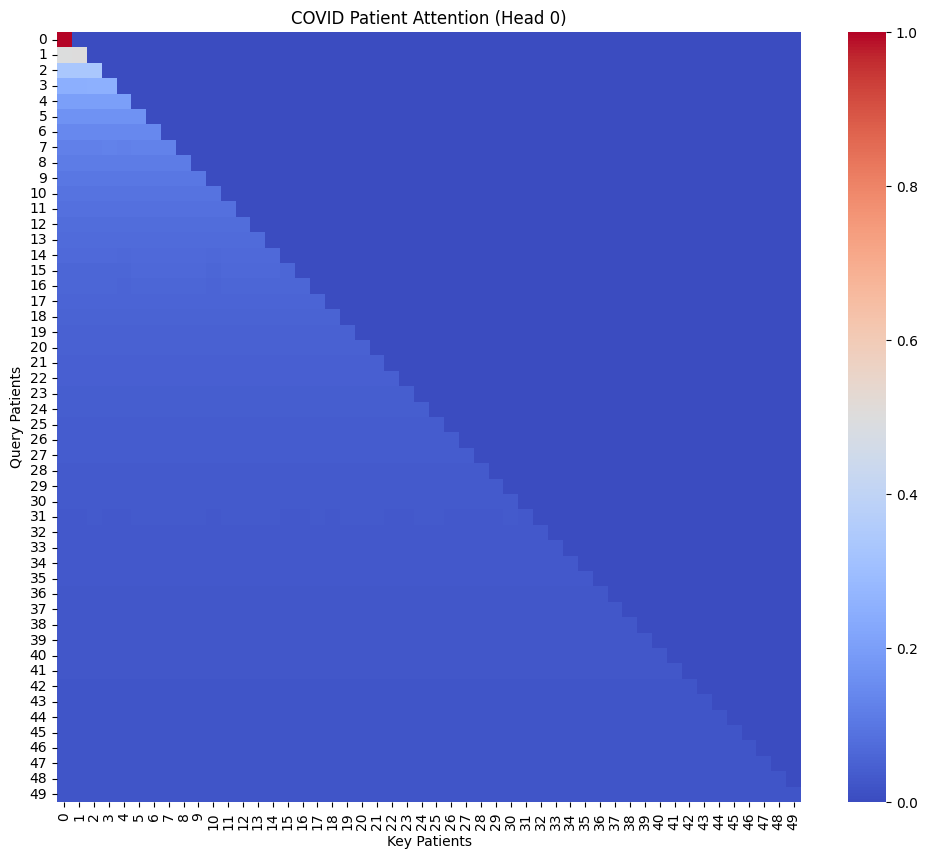

In [54]:
head_idx = 0  # First attention head

# 2. Since visualizing all 8490 patients is impractical, select a window
start_idx, end_idx = 0, 50  # First 50 patients

# 3. Extract the attention submatrix
attention_submatrix = attn_weights[0, head_idx, start_idx:end_idx, start_idx:end_idx]

# 4. Convert to numpy and plot
plt.figure(figsize=(12, 10))
sns.heatmap(attention_submatrix.detach().cpu().numpy(),
           cmap="coolwarm",
           xticklabels=df_encoded.index[start_idx:end_idx],
           yticklabels=df_encoded.index[start_idx:end_idx])
plt.title(f"COVID Patient Attention (Head {head_idx})")
plt.xlabel("Key Patients")
plt.ylabel("Query Patients")
plt.show()

                                  Feature  Importance  Primary_Latent_Dim
32          new_deaths_smoothed_lower_bin    0.020923                  11
14                  total_cases_lower_bin    0.020344                   6
34              new_deaths_smoothed_alpha    0.019803                   7
21      total_cases_per_million_upper_bin    0.019572                   5
4                        days_since_start    0.019287                   9
31         total_deaths_per_million_alpha    0.019191                   1
3                    AverageSmokersAdults    0.019174                  14
46  new_deaths_smoothed_per_million_alpha    0.018816                  14
47       new_deaths_per_million_lower_bin    0.018698                  14
10                             days_sin_4    0.018433                   6


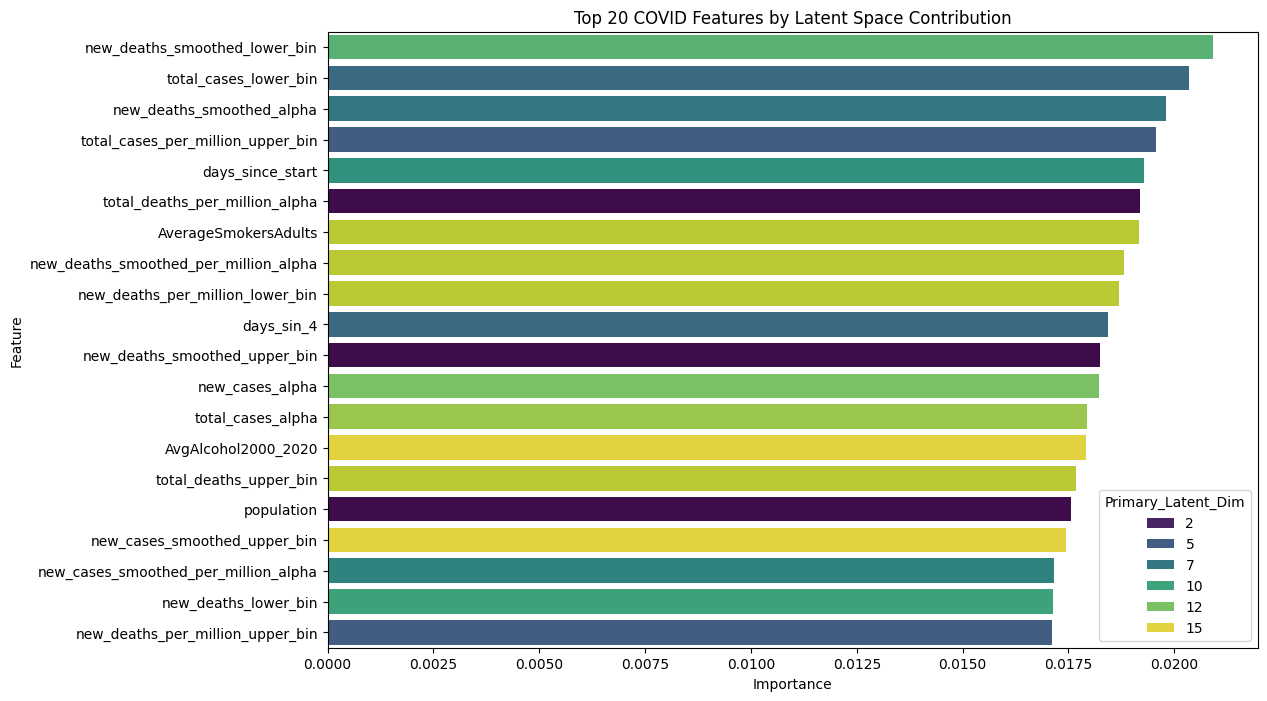

In [58]:
def get_latent_feature_importance(model, feature_names):
    """
    Properly analyze feature importance for your model architecture

    Args:
        model: Your StableRopelessMLA instance
        feature_names: List of 50 feature names from df_encoded.columns

    Returns:
        DataFrame with features sorted by importance
    """
    # Transpose the weight matrix to get (features × latent_dim)
    weights = model.W_dkv.weight.detach().cpu().numpy().T  # Now shape (50, 16)

    # Calculate importance (average absolute weight per feature)
    importance = np.abs(weights).mean(axis=1)

    # Create DataFrame
    feat_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance,
        'Primary_Latent_Dim': np.argmax(np.abs(weights), axis=1)
    })

    return feat_importance.sort_values('Importance', ascending=False)

# Usage
feature_importance = get_latent_feature_importance(model, df_encoded.columns.tolist())
print(feature_importance.head(10))

# Visualize
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance.head(20),
            x='Importance',
            y='Feature',
            hue='Primary_Latent_Dim',
            palette='viridis')
plt.title('Top 20 COVID Features by Latent Space Contribution')
plt.show()